# Sendy Data
Sendy Ltd is a crowd sourced courier marketplace tackling last mile, on­demand, and hyper­local deliveries in Kenya. Sendy provides an app and web platform that enables individual and businesses to connect with Riders and Drivers and request on­demand or scheduled courier services at anytime, any day, 24/7. To support our mission, we crowdsource vehicles and their drivers (boda bodas, vans and pickup trucks, 3 ­tonne trucks), extensively vet and trainer vehicles and then connect them to our GPS enabled tracking and dispatching system. 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### Load our libraries

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

load the dataset

In [201]:
df = pd.read_csv('Train.csv')

Now we get an overview of the data

In [202]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

Lets conver Order,User and Rider Id to their integer values

In [204]:
df['Order No'] = df['Order No'].map(lambda num: int(num.split('_')[-1]))
df['User Id'] = df['User Id'].map(lambda num: int(num.split('_')[-1]))
df['Rider Id'] = df['Rider Id'].map(lambda num: int(num.split('_')[-1]))

create a new dataframe sorted according to order number

In [205]:
df = df.sort_values(['Order No']).set_index(['Order No']).copy()

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 1 to 28268
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   User Id                                    21201 non-null  int64  
 1   Vehicle Type                               21201 non-null  object 
 2   Platform Type                              21201 non-null  int64  
 3   Personal or Business                       21201 non-null  object 
 4   Placement - Day of Month                   21201 non-null  int64  
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 6   Placement - Time                           21201 non-null  object 
 7   Confirmation - Day of Month                21201 non-null  int64  
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 9   Confirmation - Time                        21201 non-null  object 
 10  Arrival at Pickup - Da

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with Missing Values

In [207]:
# Lets view columns with null values
df.isnull().sum()

User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time                    0
Distance (KM)                  

Temperature and precipitation columns have some null values , Lets find out what percentage of their data is missing

In [208]:
temp_missing_perc = (df['Temperature'].isnull().sum())/(df['Temperature'].shape[0]) * 100
prec_missing_perc = (df['Precipitation in millimeters'].isnull().sum())/(df['Precipitation in millimeters'].shape[0]) * 100
print(f'Missing Data \n Precipitation : {prec_missing_perc}% \n Temperature : {temp_missing_perc}%')

Missing Data 
 Precipitation : 97.39634922880997% 
 Temperature : 20.593368237347295%


Precipitation column is missing 97% of its data , lets view the data to see why it has missing values

In [209]:
# Lets view rows with a value
df.loc[~df['Precipitation in millimeters'].isnull()].shape

(552, 28)

The reason for the null values could be that there was no precipitation to be recorded so we can go ahead and fill the missing values with a 0.

In [210]:
df['Precipitation in millimeters'].fillna(0,inplace=True)

In [211]:
df['Precipitation in millimeters'].describe()

count    21201.000000
mean         0.205839
std          3.029194
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.100000
Name: Precipitation in millimeters, dtype: float64

Temperature column is missing 20% of its data, temperature cannot be absent or 0 , hence we can assume the data was just not recorded. We can impute the most common value ,mean or median. In  this case lets us the median value as this will not change the statistics of the dataset by much

In [212]:
# Statistics before imputation 
df['Temperature'].describe()

count    16835.000000
mean        23.258889
std          3.615768
min         11.200000
25%         20.600000
50%         23.500000
75%         26.000000
max         32.100000
Name: Temperature, dtype: float64

In [213]:
df['Temperature'].fillna(df['Temperature'].median(),inplace=True)

In [214]:
# Statistics after imputation 
df['Temperature'].describe()

count    21201.000000
mean        23.308542
std          3.223481
min         11.200000
25%         21.400000
50%         23.500000
75%         25.300000
max         32.100000
Name: Temperature, dtype: float64

We have dealt with all missing values so we can proceed to column wrangling

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column Wrangling

Lets convert the times to datetime objects for easy use in time series plotting, we will only extract the hour to reduce the number of unique values

In [215]:
df[['Placement - Time','Confirmation - Time','Pickup - Time','Arrival at Destination - Time']]

,Placement - Time,Confirmation - Time,Pickup - Time,Arrival at Destination - Time
Order No,,,,
1,12:10:50 PM,12:12:24 PM,12:20:43 PM,12:32:52 PM
2,10:09:10 AM,10:09:50 AM,10:51:52 AM,11:23:55 AM
3,3:00:12 PM,3:16:26 PM,3:53:37 PM,4:30:03 PM
4,2:58:52 PM,2:59:22 PM,3:52:51 PM,4:20:59 PM
6,2:37:48 PM,3:29:21 PM,4:03:58 PM,4:12:25 PM
...,...,...,...,...
28263,11:14:54 AM,12:08:52 PM,12:19:02 PM,12:25:37 PM
28264,10:52:32 AM,10:54:19 AM,11:02:32 AM,12:12:30 PM
28266,8:39:13 AM,8:42:37 AM,8:53:21 AM,9:30:58 AM


In [216]:
df[['Placement - Time','Confirmation - Time','Pickup - Time','Arrival at Destination - Time']] = df[['Placement - Time','Confirmation - Time','Pickup - Time','Arrival at Destination - Time']].apply(lambda col:pd.DatetimeIndex(col).hour)

In [217]:
df['Placement - Time']

Order No
1        12
2        10
3        15
4        14
6        14
         ..
28263    11
28264    10
28266     8
28267    16
28268    12
Name: Placement - Time, Length: 21201, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Numerical Analysis

Let's to analyze the column <strong style='color:yellow;'>'Time from Pickup to Arrival'

In [218]:
# Correlation Matrix for the column
df.corr()['Time from Pickup to Arrival']

User Id                                      0.018138
Platform Type                               -0.003827
Placement - Day of Month                    -0.014710
Placement - Weekday (Mo = 1)                 0.009693
Placement - Time                             0.001266
Confirmation - Day of Month                 -0.014701
Confirmation - Weekday (Mo = 1)              0.009744
Confirmation - Time                          0.006096
Arrival at Pickup - Day of Month            -0.014701
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Pickup - Day of Month                       -0.014701
Pickup - Weekday (Mo = 1)                    0.009744
Pickup - Time                                0.010314
Arrival at Destination - Day of Month       -0.014701
Arrival at Destination - Weekday (Mo = 1)    0.009744
Arrival at Destination - Time                0.118853
Distance (KM)                                0.580608
Temperature                                  0.005242
Precipitation in millimeters

Distance correlates the most with our column. Lets plot a line graph to see this

<AxesSubplot:xlabel='Distance (KM)', ylabel='Time from Pickup to Arrival'>

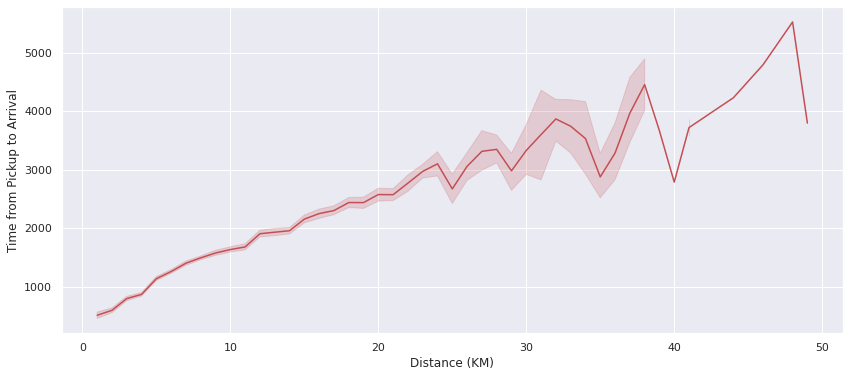

In [219]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.lineplot(x='Distance (KM)',y='Time from Pickup to Arrival',data=df,color='r')

Time taken between pickup and arrival seems to grow with the distance. This explains itself as more time is taken to deliver over long distances. There are some values which seem a bit incossistent . This may be due to another feature

Lets take a look at order placement ,confirmation,pickup and arrival accoding to time

[Text(0.5, 0, ''), Text(0, 0.5, ''), Text(0.5, 1.0, 'Order Arrival times')]

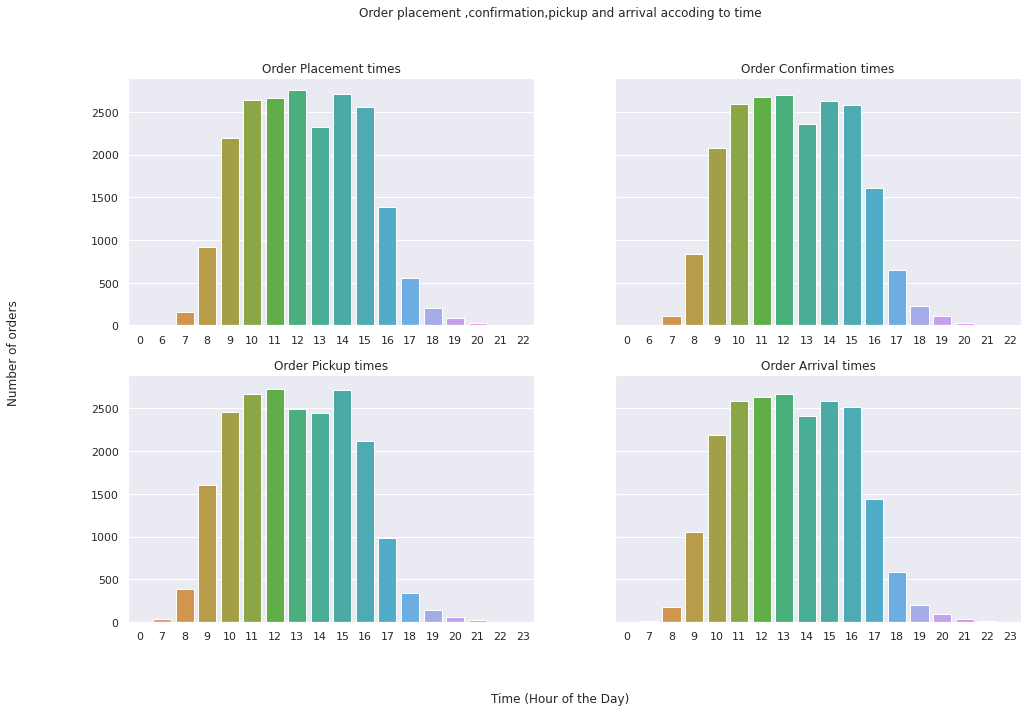

In [220]:
fig, axes = plt.subplots(2, 2, sharey=True,figsize=(16,10))
fig.suptitle('Order placement ,confirmation,pickup and arrival accoding to time')
fig.supylabel('Number of orders')
fig.supxlabel('Time (Hour of the Day)')
sns.countplot(x=df['Placement - Time'],ax=axes[0][0]).set(xlabel=None,ylabel=None,title='Order Placement times')
sns.countplot(x=df['Confirmation - Time'],ax=axes[0][1]).set(xlabel=None,ylabel=None,title='Order Confirmation times')
sns.countplot(x=df['Pickup - Time'],ax=axes[1][0]).set(xlabel=None,ylabel=None,title='Order Pickup times')
sns.countplot(x=df['Arrival at Destination - Time'],ax=axes[1][1]).set(xlabel=None,ylabel=None,title='Order Arrival times')

Peak hours range from 9 AM to 4 PM . This is the time when the most orders are made.

In [221]:
df.corr()

,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
User Id,1.000000,-0.018122,-0.016579,0.002528,0.024970,-0.016576,0.002549,0.022650,-0.016576,0.002549,...,0.020360,-0.006908,-0.006871,0.006319,0.121854,-0.046961,0.053308,0.000454,0.008612,0.018138
Platform Type,-0.018122,1.000000,0.012764,-0.058038,-0.024730,0.012770,-0.058005,-0.021555,0.012770,-0.058005,...,-0.023506,0.005528,0.214625,-0.011401,-0.002742,0.021327,0.006319,0.043924,-0.019111,-0.003827
Placement - Day of Month,-0.016579,0.012764,1.000000,0.026148,0.008670,0.999998,0.026122,0.008740,0.999998,0.026122,...,0.005710,-0.007585,0.012815,-0.044518,-0.004929,-0.005453,0.007541,0.002077,-0.010908,-0.014710
Placement - Weekday (Mo = 1),0.002528,-0.058038,0.026148,1.000000,-0.008759,0.026132,0.999952,-0.007327,0.026132,0.999952,...,-0.002580,0.003582,0.027908,-0.024879,-0.000918,0.011008,-0.004299,-0.000875,-0.007403,0.009693
Placement - Time,0.024970,-0.024730,0.008670,-0.008759,1.000000,0.008672,-0.008748,0.989488,0.008672,-0.008748,...,0.967391,-0.049367,0.362344,-0.080127,0.057487,-0.037447,0.022988,-0.005497,0.003522,0.001266
Confirmation - Day of Month,-0.016576,0.012770,0.999998,0.026132,0.008672,1.000000,0.026123,0.008743,1.000000,0.026123,...,0.005715,-0.007587,0.012816,-0.044520,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
Confirmation - Weekday (Mo = 1),0.002549,-0.058005,0.026122,0.999952,-0.008748,0.026123,1.000000,-0.007308,0.026123,1.000000,...,-0.002555,0.003574,0.027916,-0.024886,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744
Confirmation - Time,0.022650,-0.021555,0.008740,-0.007327,0.989488,0.008743,-0.007308,1.000000,0.008743,-0.007308,...,0.974388,-0.050799,0.360169,-0.078763,0.053688,-0.031790,0.022002,-0.003314,0.006269,0.006096
Arrival at Pickup - Day of Month,-0.016576,0.012770,0.999998,0.026132,0.008672,1.000000,0.026123,0.008743,1.000000,0.026123,...,0.005715,-0.007587,0.012816,-0.044520,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
Arrival at Pickup - Weekday (Mo = 1),0.002549,-0.058005,0.026122,0.999952,-0.008748,0.026123,1.000000,-0.007308,0.026123,1.000000,...,-0.002555,0.003574,0.027916,-0.024886,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Categorical Analysis

Lets look at the column <strong style='color:green;'>Personal or Business

Text(0, 0.5, 'Number of Orders')

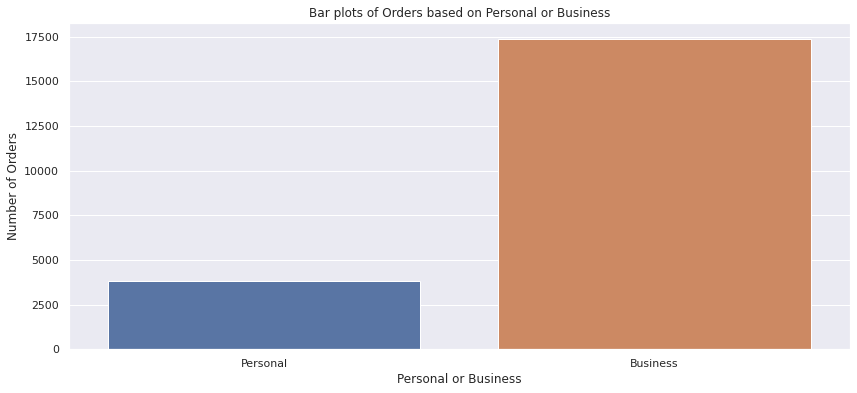

In [222]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Bar plots of Orders based on Personal or Business')
sns.countplot(x='Personal or Business',data=df)
plt.ylabel('Number of Orders')

Most orders are from businesses

In [223]:
dfper = df.loc[df['Personal or Business'] == 'Personal']
dfbus = df.loc[df['Personal or Business'] == 'Business']

<AxesSubplot:xlabel='Distance (KM)', ylabel='Time from Pickup to Arrival'>

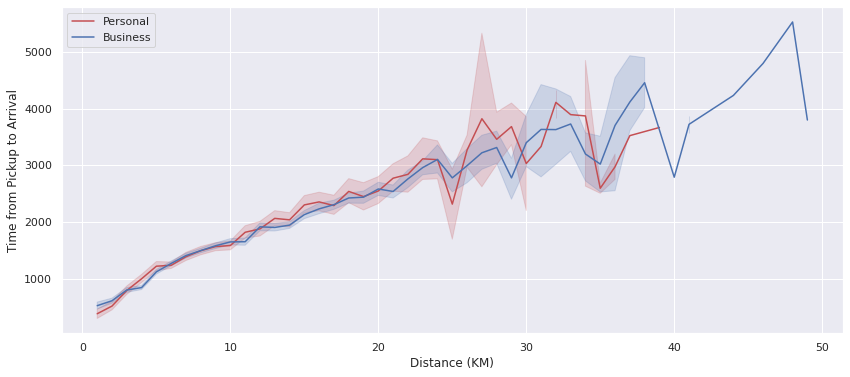

In [224]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.lineplot(x='Distance (KM)',y='Time from Pickup to Arrival',data=dfper,color='r',label='Personal')
sns.lineplot(x='Distance (KM)',y='Time from Pickup to Arrival',data=dfbus,color='b',label='Business')

Personal Orders cover smaller distances compared to business orders

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Feature Selection

Our target for this is the time from pickup to arrival column. We are going to  try to predict this column using the data given using select features. In our case we will use numerical features because our categorical features show no correlation with the column.

In [225]:
df.corr()['Time from Pickup to Arrival']

User Id                                      0.018138
Platform Type                               -0.003827
Placement - Day of Month                    -0.014710
Placement - Weekday (Mo = 1)                 0.009693
Placement - Time                             0.001266
Confirmation - Day of Month                 -0.014701
Confirmation - Weekday (Mo = 1)              0.009744
Confirmation - Time                          0.006096
Arrival at Pickup - Day of Month            -0.014701
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Pickup - Day of Month                       -0.014701
Pickup - Weekday (Mo = 1)                    0.009744
Pickup - Time                                0.010314
Arrival at Destination - Day of Month       -0.014701
Arrival at Destination - Weekday (Mo = 1)    0.009744
Arrival at Destination - Time                0.118853
Distance (KM)                                0.580608
Temperature                                  0.005242
Precipitation in millimeters

We won't be using the time columns as that beats the purpose,we will also exclude the IDs as they also show no correlation to the column we are trying to predict. We will pick columns with some correlation to our data to avoid overfitting the model

In [276]:
features = ['User Id', 'Platform Type', 'Placement - Day of Month',
            'Placement - Weekday (Mo = 1)', 'Placement - Time',
            'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
            'Confirmation - Time', 'Arrival at Pickup - Day of Month',
            'Pickup - Weekday (Mo = 1)','Pickup - Time',
            'Distance (KM)',  'Pickup Lat', 'Pickup Long',
            'Destination Lat', 'Destination Long', 'Rider Id']


In [277]:
# Assign our X and y values
X = df[features]
y = df['Time from Pickup to Arrival']

In [278]:
X.columns

Index(['User Id', 'Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Distance (KM)',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

Lets ensure they both have the same number of rows

In [279]:
print(X.shape[0] == y.shape[0])

True


We can now proceed to splitting the data

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Building our model

We are going to use the RandomForestRegressor for this prediction

Lets first split the data into training and validation sets . We can do this in the ratio 7:3 

In [280]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=1)

We now define our model

In [281]:
model = RandomForestRegressor(random_state=1)

Lets fit the model with our training data

In [282]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [283]:
model.score(X_valid,y_valid)

0.3446640149345378